#***Fake or Real Face detection using CNN***

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import zipfile

In [34]:
zip=zipfile.ZipFile('data.zip')
zip.extractall()

In [35]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape = (64,64,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=2500,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])# optimising model

In [37]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)

In [44]:
training_set=train_datagen.flow_from_directory('data/train',target_size=(64,64),batch_size=100,class_mode='binary')
val_set=val_datagen.flow_from_directory('data/valid',target_size=(64,64),batch_size=100,class_mode='binary')

Found 2041 images belonging to 2 classes.
Found 2041 images belonging to 2 classes.


In [45]:
history=model.fit(training_set,steps_per_epoch=15,epochs=30,validation_data=val_set,validation_steps=2)
# saving the model
model.save('FRFD.h5')

Epoch 1/30
15/15 [==============================] - 42s 3s/step - loss: 0.6488 - accuracy: 0.6135 - val_loss: 0.6553 - val_accuracy: 0.6300
Epoch 2/30
15/15 [==============================] - 42s 3s/step - loss: 0.6412 - accuracy: 0.6333 - val_loss: 0.6163 - val_accuracy: 0.6500
Epoch 3/30
15/15 [==============================] - 42s 3s/step - loss: 0.6342 - accuracy: 0.6500 - val_loss: 0.6711 - val_accuracy: 0.5900
Epoch 4/30
15/15 [==============================] - 42s 3s/step - loss: 0.6228 - accuracy: 0.6420 - val_loss: 0.6179 - val_accuracy: 0.6600
Epoch 5/30
15/15 [==============================] - 42s 3s/step - loss: 0.6270 - accuracy: 0.6360 - val_loss: 0.6098 - val_accuracy: 0.6550
Epoch 6/30
15/15 [==============================] - 41s 3s/step - loss: 0.6213 - accuracy: 0.6495 - val_loss: 0.6817 - val_accuracy: 0.5700
Epoch 7/30
15/15 [==============================] - 41s 3s/step - loss: 0.6140 - accuracy: 0.6697 - val_loss: 0.5554 - val_accuracy: 0.6950
Epoch 8/30
15/15 [==

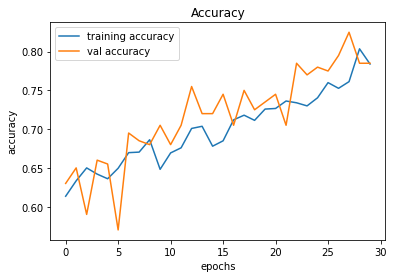

In [46]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('Accuracy.png')

Saved Model & Graph to disk


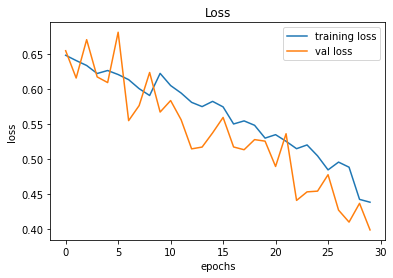

In [47]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('Loss.png')
print("Saved Model & Graph to disk")


#***Testing the model***

In [31]:
from tensorflow.keras.models import model_from_json # used to import model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image# used for preproccesing
import os

In [ ]:
zip=zipfile.ZipFile('test.zip')
zip.extractall()

In [48]:
model=load_model('FRFD.h5')
print("loaded model from disk")

loaded model from disk


In [49]:
def classify(img_file):
    img_name=img_file
    test_image=image.load_img(img_name,target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    result=model.predict(test_image)

    if result[0][0]==1:
        prediction='Fake Face'
        print("\n In this{0}the face is{1}!".format(img_name,prediction))   
    else:
        prediction='Real Face'
        print("\n In this{0}the face is{1}!".format(img_name,prediction))

In [50]:
cur_path = os.getcwd()
path = os.path.join(cur_path,'test/')

In [51]:
files=[]
# r=root,d=directories,f=files
for r,d,f in os.walk(path):
    for file in f:
        if '.jpeg' or '.jpg' or '.png' or '.JPEG' in file:
            files.append(os.path.join(r,file))
for f in files: 
    classify(f)


 In this/content/test/2.jpgthe face isFake Face!

 In this/content/test/4.jpgthe face isReal Face!

 In this/content/test/0.jpgthe face isReal Face!

 In this/content/test/5.jpgthe face isFake Face!

 In this/content/test/3.jpgthe face isFake Face!

 In this/content/test/1.jpgthe face isFake Face!
